In [1]:
'''# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session'''

'# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'

# 

# Effects of Climate Changes on Crop Yields using Machine Learning Techniques

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

In [3]:
#import dataset
df=pd.read_csv("C:\\Users\\ahmed\\OneDrive\\سطح المكتب\\climate-ds.csv")

### Data Preprocessing
#### 1) Checking our data****

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [6]:
# Cheching if there are duplicated rows
print("duplicated: ",df.duplicated().sum(),"\n")
print("*"*50,"\n")
# Cheching if there are Nulvalues
print("nulls ; ",df.isna().sum(),"\n")

duplicated:  0 

************************************************** 

nulls ;  Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64 



array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'average_rain_fall_mm_per_year'}>,
        <AxesSubplot:title={'center':'pesticides_tonnes'}>],
       [<AxesSubplot:title={'center':'avg_temp'}>,
        <AxesSubplot:title={'center':'hg/ha_yield'}>]], dtype=object)

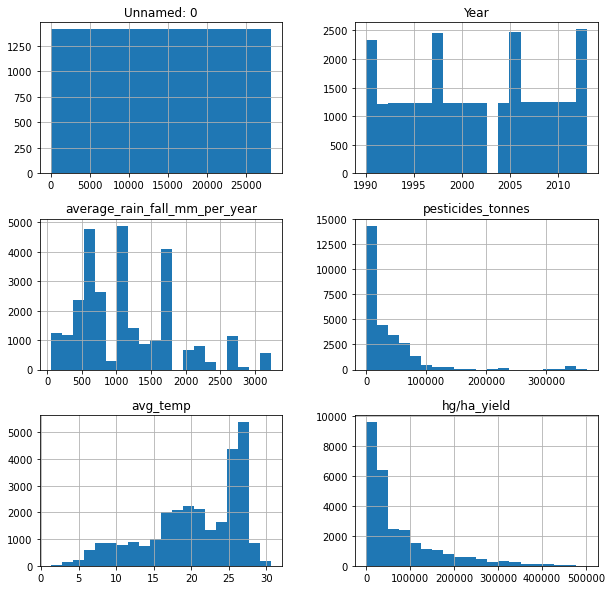

In [7]:
df.hist(bins=20,figsize=(10,10))

#### 2) Cleaning our data
\

In [8]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


In [9]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [10]:
for col in df:
    print(col," = ",df[col].nunique())

Area  =  101
Item  =  10
Year  =  23
average_rain_fall_mm_per_year  =  100
pesticides_tonnes  =  1673
avg_temp  =  1831
hg/ha_yield  =  11514


(array([16022.,  4874.,  2628.,  1884.,  1201.,   681.,   546.,   211.,
          163.,    32.]),
 array([5.000000e+01, 5.018620e+04, 1.003224e+05, 1.504586e+05,
        2.005948e+05, 2.507310e+05, 3.008672e+05, 3.510034e+05,
        4.011396e+05, 4.512758e+05, 5.014120e+05]),
 <BarContainer object of 10 artists>)

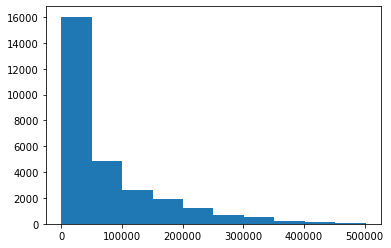

In [11]:
plt.figure()
plt.hist(df["hg/ha_yield"])

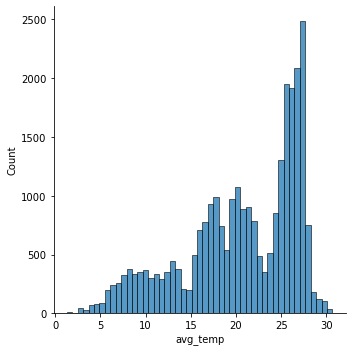

In [12]:
sns.displot(df["avg_temp"])

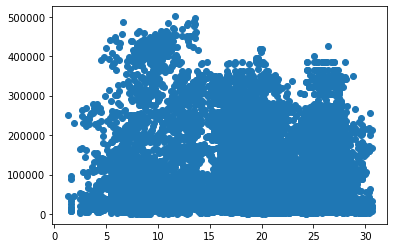

In [13]:
plt.scatter(x=df["avg_temp"],y=df["hg/ha_yield"])

<AxesSubplot:xlabel='avg_temp'>

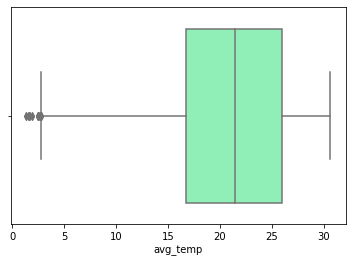

In [14]:
sns.boxplot(data=df,x='avg_temp',palette='rainbow',orient='h')

<AxesSubplot:xlabel='pesticides_tonnes'>

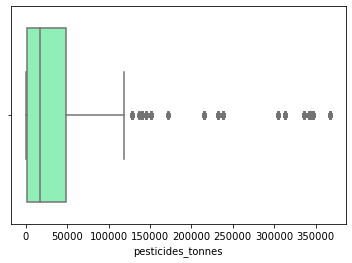

In [15]:
sns.boxplot(data=df,x='pesticides_tonnes',palette='rainbow',orient='h')

In [16]:
#drop outliers
Q1 = np.percentile(df['avg_temp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['avg_temp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['avg_temp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['avg_temp'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (28242, 7)
New Shape:  (28208, 7)


In [ ]:
sns.pairplot(df)

In [ ]:
sns.barplot(data=df,x="avg_temp",y="Year",)

#### 3) Encoding our data

In [22]:
"""from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Area"]=encoder.fit_transform(df["Area"])
df["Item"]=encoder.fit_transform(df["Item"])"""

In [23]:
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,1,1990,1485,121.00,16.37,36613
1,0,3,1990,1485,121.00,16.37,66667
2,0,4,1990,1485,121.00,16.37,23333
3,0,5,1990,1485,121.00,16.37,12500
4,0,6,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,100,4,2013,657,2550.07,19.76,22581
28238,100,5,2013,657,2550.07,19.76,3066
28239,100,6,2013,657,2550.07,19.76,13142
28240,100,7,2013,657,2550.07,19.76,22222


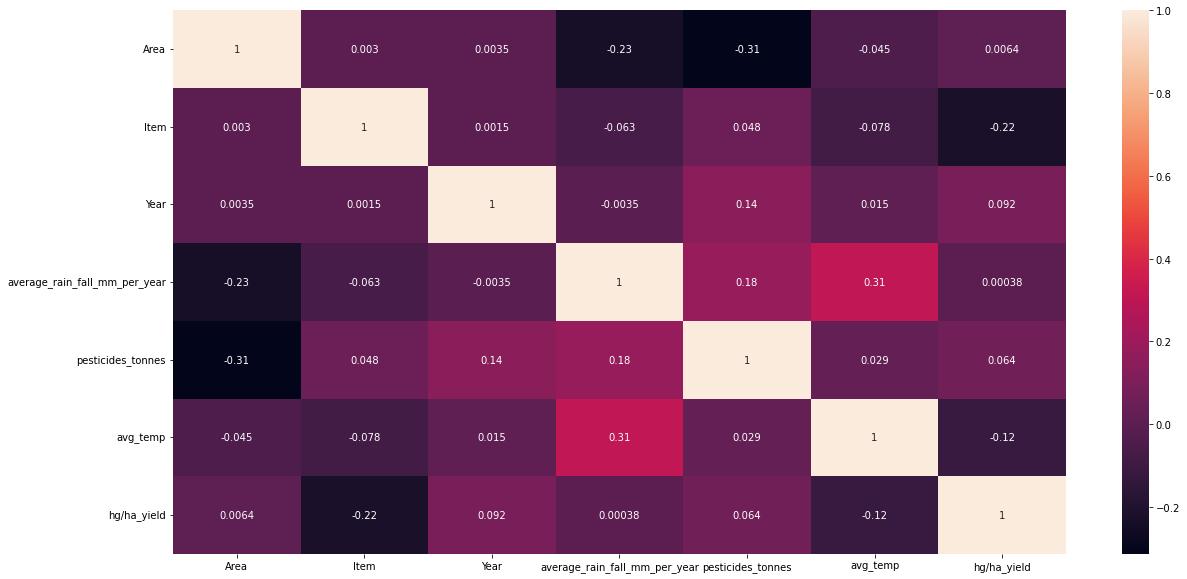

In [24]:
plt.figure(figsize=((20,10)))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
X=df.drop(["hg/ha_yield"],axis=1)
y=df["hg/ha_yield"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=0,shuffle=True)

#### 4) Scaling our data

In [26]:
from sklearn.preprocessing import  StandardScaler
scalar=StandardScaler()
X_train=pd.DataFrame(scalar.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scalar.transform(X_test),columns=X_train.columns)


## Regression


In [27]:

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('R2 score:' , metrics.r2_score(y_test, y_pred ))
pd.DataFrame({"actual " :y_test,"prediction:": y_pred})

R2 score: 0.08045488978006332


,actual,prediction:
24465,69978,113470.452275
7582,8923,68994.607739
20430,15198,76471.683783
18559,40000,16670.958967
208,33649,110848.677948
...,...,...
8331,78184,100675.949401
3957,220095,114148.355986
24317,60135,98561.437361
1001,19999,51342.702956


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,learning_rate=0.4)
GBR.fit(X_train, y_train)
y_pred2 = GBR.predict(X_test)

print('R2 score:' , metrics.r2_score(y_test, y_pred2 ))
pd.DataFrame({"actual " :y_test,"prediction:": y_pred2})

R2 score: 0.8960660212489647


,actual,prediction:
24465,69978,132729.675252
7582,8923,-1934.923674
20430,15198,28603.457242
18559,40000,92878.750399
208,33649,70061.324950
...,...,...
8331,78184,95245.872899
3957,220095,224544.624794
24317,60135,83222.030682
1001,19999,37952.408978


In [29]:
from sklearn.ensemble import RandomForestRegressor
reeg=RandomForestRegressor(n_estimators=60,random_state=0)
reeg.fit(X_train,y_train)
y_pred3 = reeg.predict(X_test)
pd.DataFrame({"actual " :y_test,"prediction:": y_pred3})
print('R2 score:' , metrics.r2_score(y_test, y_pred3))


R2 score: 0.9834410323434012


In [30]:
print("score train :",reeg.score(X_train,y_train))
print("score test :",reeg.score(X_test,y_test))

score train : 0.9975415342566807
score test : 0.9834410323434012


# > **random forest regressor is the best**